### Target 1 (Regression) -> WineQuality
### Target 2 (classification) --> WineType(Red or White)
 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys
import yaml
import numpy as np


In [2]:
df=pd.read_csv("/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/data/raw/winequality.csv")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is_red'],
      dtype='object')

In [5]:
unecessary_col=['Unnamed: 0']

In [6]:
df.drop(labels=unecessary_col,axis='columns',inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


<Axes: title={'center': 'Alcohal type Distribution'}, ylabel='count'>

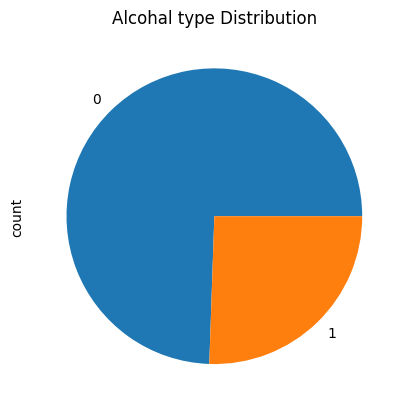

In [7]:
df['is_red'].value_counts().plot(kind='pie',title='Alcohal type Distribution')

In [8]:
print("maximum quality value=",max(df['quality']),"minimum quality value=",min(df['quality']))

maximum quality value= 9 minimum quality value= 3


In [9]:
%pwd

'/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/experiments'

In [10]:
os.chdir('../')
%pwd

'/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end'

### Model Training and Tracking(Parameters and Models)

In [13]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import mlflow
from sklearn.model_selection import GridSearchCV

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [15]:
df.iloc[:,1:12].head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [16]:
y_reg=df['quality']
y_clf=df['is_red']

In [17]:
X_clf=df.iloc[:,1:12]
X_clf.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [18]:
X_reg=df.iloc[:,1:11]
X_reg.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
#Train_test_split
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)
X_train_clf,X_test_clf,y_train_clf,y_test_clf=train_test_split(X_clf,y_clf,test_size=0.2,random_state=42)

In [20]:
l1_clf=RandomForestClassifier()
l2_reg=RandomForestRegressor()

In [21]:
l1_clf.fit(X_train_clf,y_train_clf)


RandomForestClassifier()

In [22]:
l2_reg.fit(X_train_reg,y_train_reg)

RandomForestRegressor()

In [23]:
l1_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
reg_input=np.array(X_test_reg.iloc[1:2,:])
reg_input

array([[3.000e-01, 2.700e-01, 4.400e+00, 5.500e-02, 1.700e+01, 1.350e+02,
        9.925e-01, 3.230e+00, 4.400e-01, 1.220e+01]])

In [25]:
reg_input.shape

(1, 10)

In [26]:
reg_output=l2_reg.predict(reg_input)
reg_output

/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.22])

In [28]:
X_test_clf.iloc[1:2,:].shape

(1, 11)

In [29]:
clf_input=np.append(np.array(X_test_reg.iloc[1:2,:]),reg_output)
clf_input

array([3.000e-01, 2.700e-01, 4.400e+00, 5.500e-02, 1.700e+01, 1.350e+02,
       9.925e-01, 3.230e+00, 4.400e-01, 1.220e+01, 6.220e+00])

In [30]:
clf_input.shape

(11,)

In [31]:
clf_input.reshape(1,11)

array([[3.000e-01, 2.700e-01, 4.400e+00, 5.500e-02, 1.700e+01, 1.350e+02,
        9.925e-01, 3.230e+00, 4.400e-01, 1.220e+01, 6.220e+00]])

In [32]:
clf_input

array([3.000e-01, 2.700e-01, 4.400e+00, 5.500e-02, 1.700e+01, 1.350e+02,
       9.925e-01, 3.230e+00, 4.400e-01, 1.220e+01, 6.220e+00])

In [37]:
clf_input=clf_input.reshape(1,-1)

In [38]:
clf_output=l1_clf.predict(clf_input)
clf_output

/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
X_test_reg.head(
    
)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1878,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4
5034,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2
3752,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9
4184,0.24,0.48,6.8,0.047,13.0,134.0,0.99616,3.23,0.70,10.0
555,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3


In [10]:
features = {
        "volatile_acidity": [0.17],
        "citric_acid": [0.74],
        "residual_sugar": [12.8],
        "chlorides": [0.045],
        "free_sulfur_dioxide": [24.0],
        "total_sulfur_dioxide": [126.0],
        "density": [0.9942],
        "pH": [3.26],
        "sulphates":  [0.38],
        "alcohol": [12.2],
    }

In [11]:
pd.DataFrame(features)

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.17,0.74,12.8,0.045,24.0,126.0,0.9942,3.26,0.38,12.2
